In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (8,4)
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.impute import KNNImputer
import sys
sys.path.append("D://NILM/code/")
from common import scatter, sliderPlot, create_features
from main import NILM


In [29]:
lst = ['tv']
path = "d:/NILM/Data_files/Parquet/Appliances12_06_04_08/"
print("data read done")
""" data ingestion done """

""" data transformation """
complete_data_lst = [] # empty list to store final data set of all appliances
for i in range(len(lst)):
    df = pd.read_parquet(f"{path}{lst[i]}.parquet")
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.drop_duplicates(inplace=True)  
    df.set_index(['timestamp'],inplace=True ,drop=True)
    df.drop(df[(df['frequency']>51) | (df['frequency']<49)].index, inplace=True)
    df.drop(df[(df['PF']>1) | (df['PF']<0)].index, inplace=True)
    # df.drop(df[(df['current']>20) |(df['current']<0.07)].index, inplace=True)
    df.drop(df[df['voltage']<140].index, inplace=True)
    
    # power is active power derived from voltage current and pf
    df['power'] = (df['voltage'] * df['current'] * df['PF']).round(2)
    
    if lst[i]=="f":
        df_appliance = df[['power',"voltage",'current']].resample(rule="1s").asfreq()
        df_appliance = df_appliance.rename(columns={'power': f'{lst[i]}_A', 'voltage': f'{lst[i]}_V', 'current': f'{lst[i]}_C'})
    else:
        df_sample_lst = [] # empty list for storing resampled data at 1sec frequency of each hour
        unique_dates = pd.Series(df.index.date).unique()
        for date1 in unique_dates: # dates when applince is on                             
            df_date = df[df.index.to_series().dt.date == date1] # dataframe of that perticular date
            hours = df_date.index.hour.unique() # hours when appliance is on
            for h in hours:
                date2 = f"{date1} {h:02d}"
                df_hour = df_date.loc[date2] # dataframe of that perticular hour at which appliance was on
                mins = df_hour.index.minute.unique()
                for m in mins:
                    date3 = f"{date2}{m:02d}"
                    df_min = df_hour.loc[date3]
                    df_resampled_hour = df_min[['power',"voltage",'current']].resample(rule="1s").asfreq()
                    df_sample_lst.append(df_resampled_hour) # adding each hour data in lst
        df_appliance = pd.concat(df_sample_lst) # concating all hours data into single data frame with missing values within signature
        df_appliance = df_appliance.rename(columns={'power': f'{lst[i]}_A', 'voltage': f'{lst[i]}_V', 'current': f'{lst[i]}_C'})
        # df_appliance = create_features(df_appliance)
    complete_data_lst.append(df_appliance) # all applince data in list

data read done


In [30]:
df = complete_data_lst[0]
df

,tv_A,tv_V,tv_C
timestamp,,,
2013-06-12 06:26:28,74.77,235.01,0.341
2013-06-12 06:26:29,74.43,235.31,0.339
2013-06-12 06:26:30,74.76,234.97,0.341
2013-06-12 06:26:31,74.83,235.19,0.341
2013-06-12 06:26:32,74.54,235.66,0.339
...,...,...,...
2013-08-03 14:55:27,72.86,219.20,0.351
2013-08-03 14:55:28,73.09,219.27,0.352
2013-08-03 14:55:29,73.09,219.25,0.352


In [31]:
df.isna().sum()

tv_A    61103
tv_V    61103
tv_C    61103
dtype: int64

In [3]:
complete_data_lst = NILM()

data read done
transormation done


In [6]:
df = complete_data_lst[4]
print(len(df))
df.isna().sum()

539854


tv_A    125155
tv_V    125155
tv_C    125155
dtype: int64

In [7]:
df

,tv_A,tv_V,tv_C
timestamp,,,
2013-06-12 06:26:28,74.77,235.01,0.341
2013-06-12 06:26:29,74.43,235.31,0.339
2013-06-12 06:26:30,74.76,234.97,0.341
2013-06-12 06:26:31,74.83,235.19,0.341
2013-06-12 06:26:32,74.54,235.66,0.339
...,...,...,...
2013-08-03 14:55:27,72.86,219.20,0.351
2013-08-03 14:55:28,73.09,219.27,0.352
2013-08-03 14:55:29,73.09,219.25,0.352


In [12]:
sliderPlot(df['tv_A'].loc['2013-06-13'])

In [13]:
sliderPlot(df['tv_A'].loc['2013-06-13'],t="line")

In [20]:
print(len(df['tv_A'].loc["2013-06-21"]))
df['tv_A'].loc["2013-06-21"].isna().sum()

3706


1595

In [21]:
sliderPlot(df['tv_A'].loc["2013-06-21"],t="line")

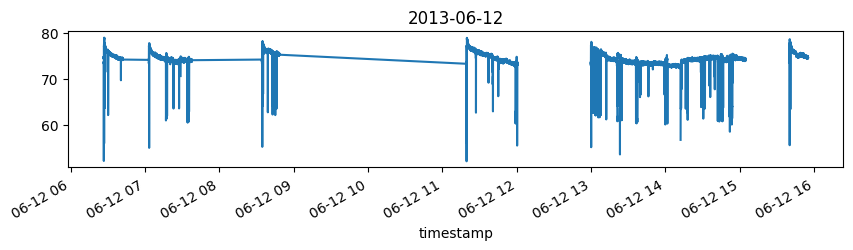

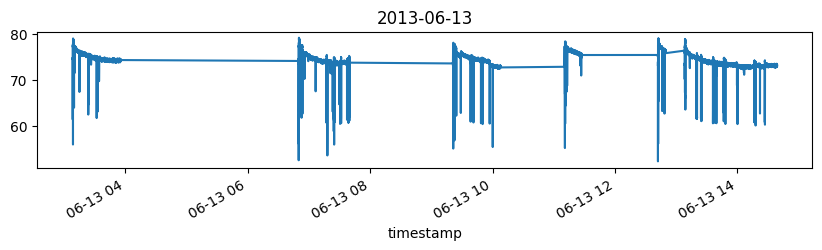

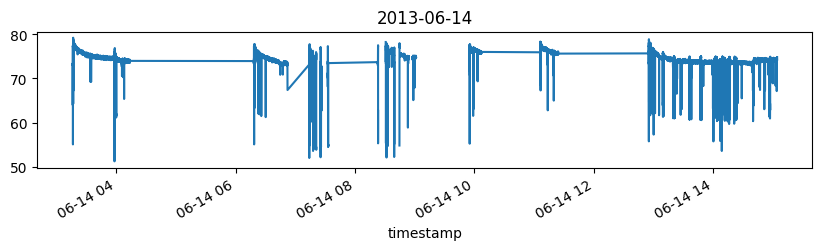

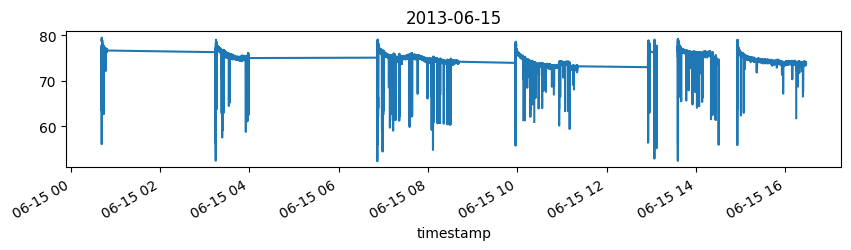

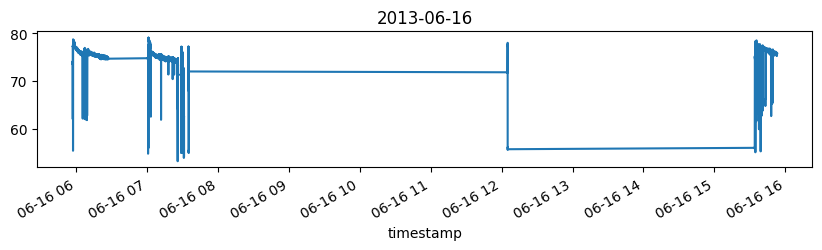

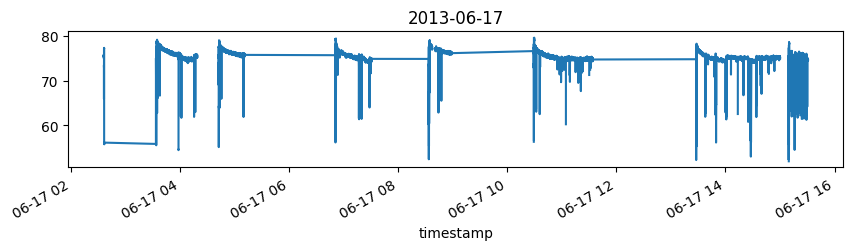

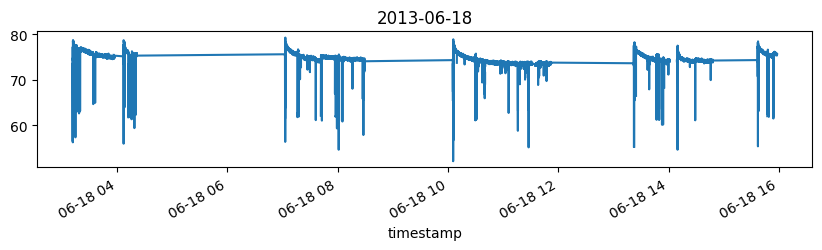

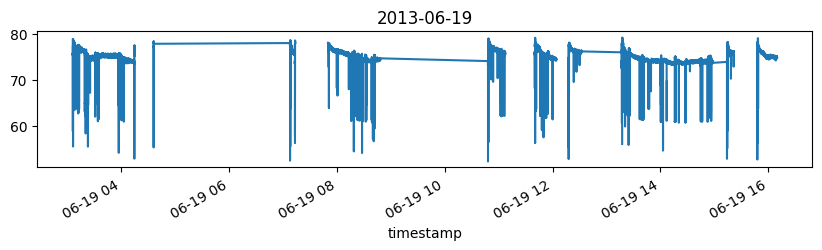

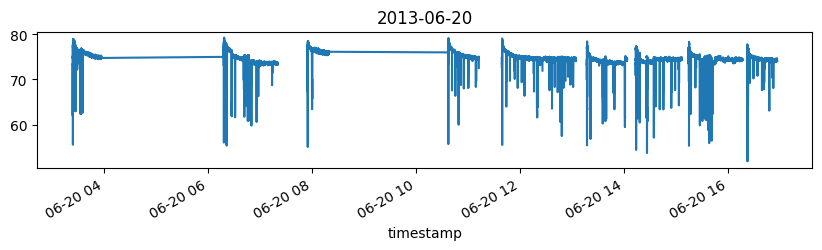

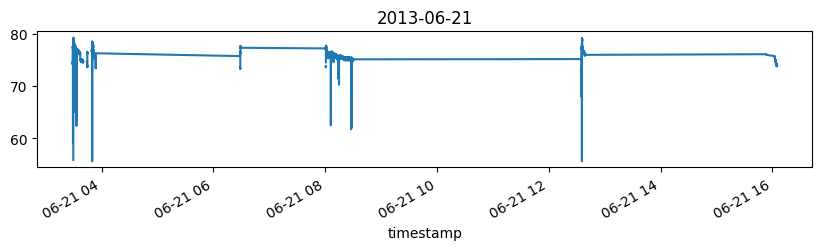

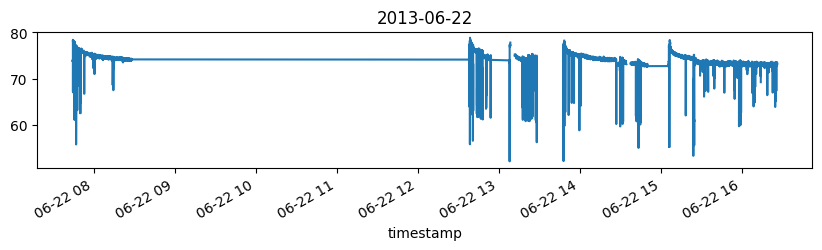

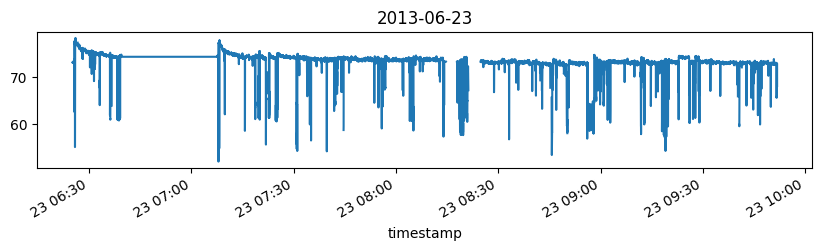

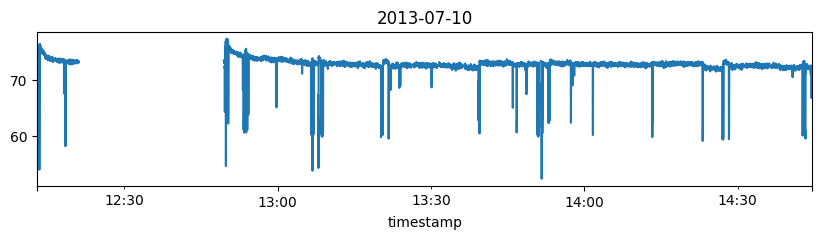

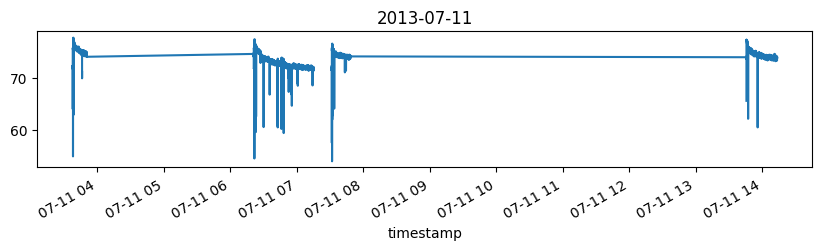

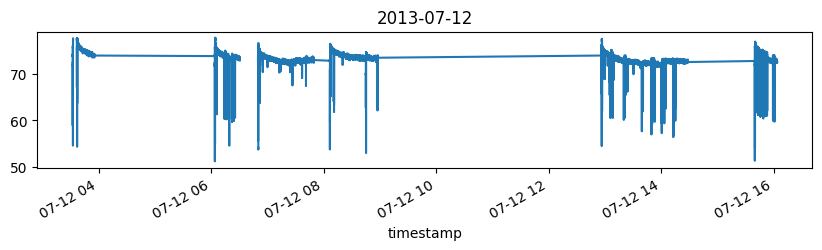

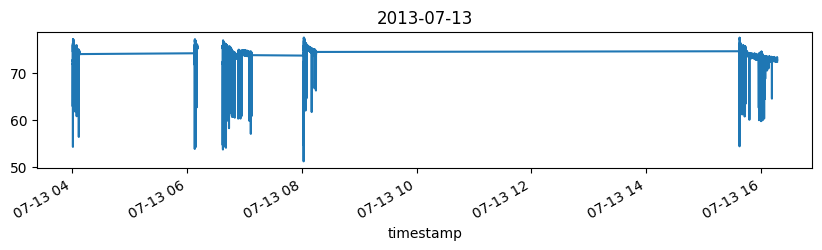

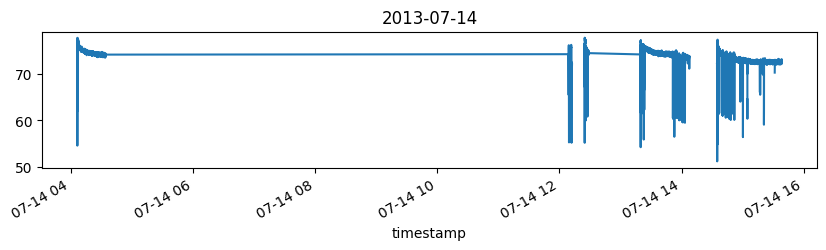

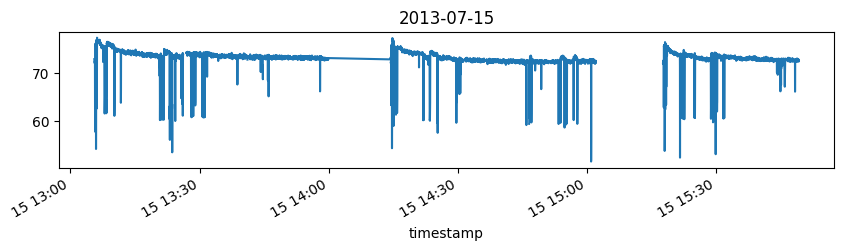

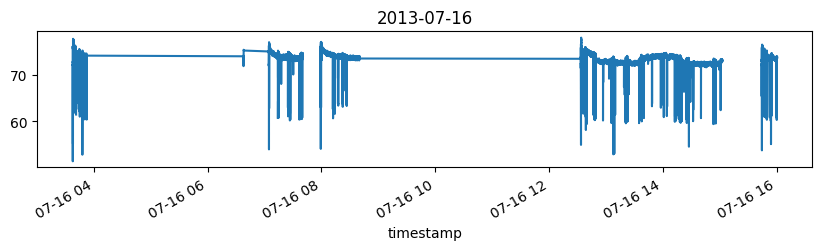

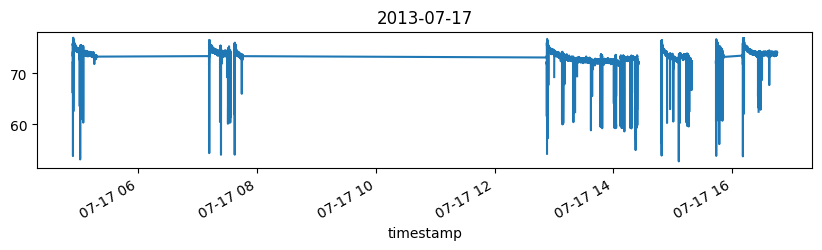

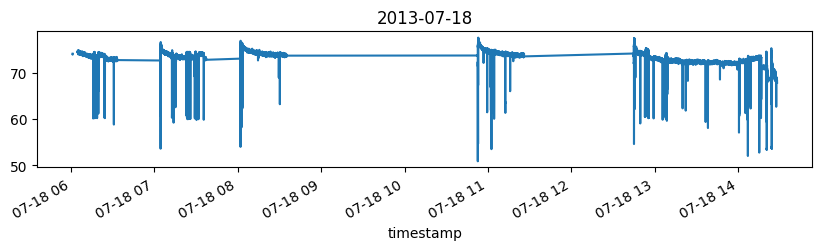

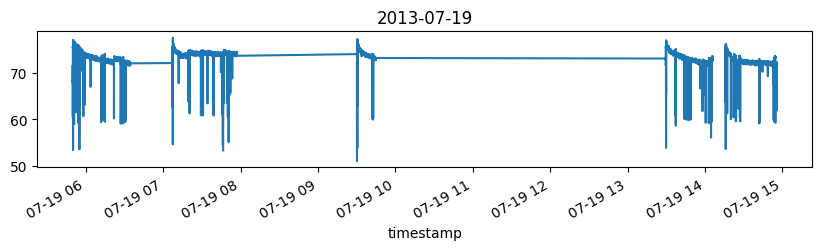

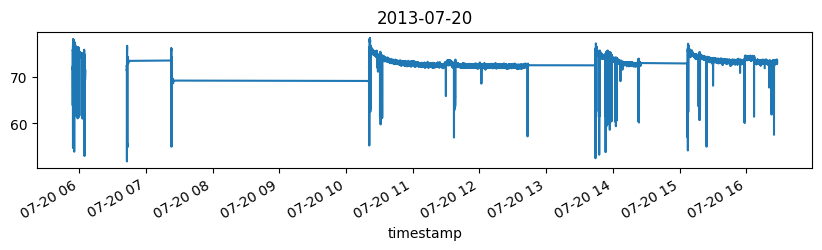

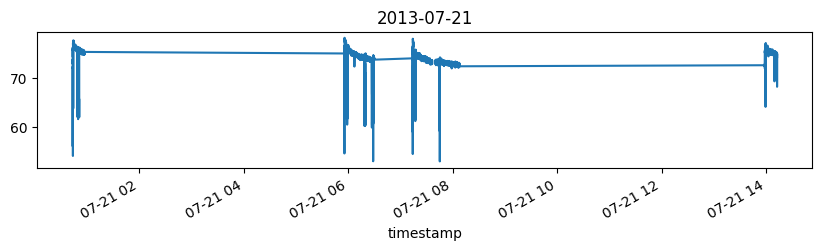

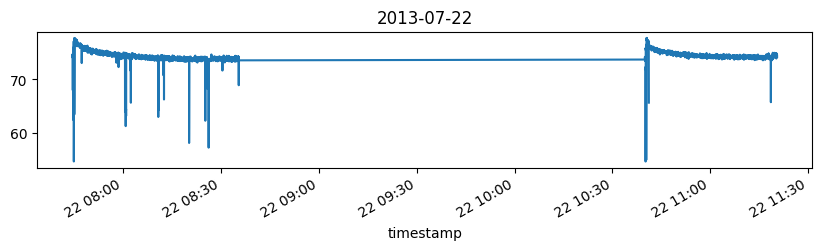

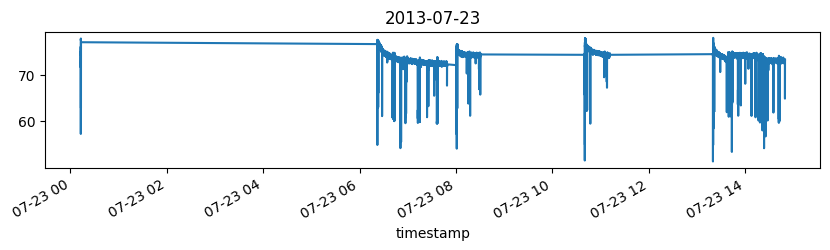

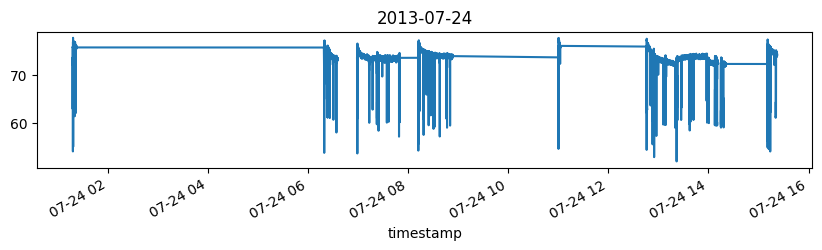

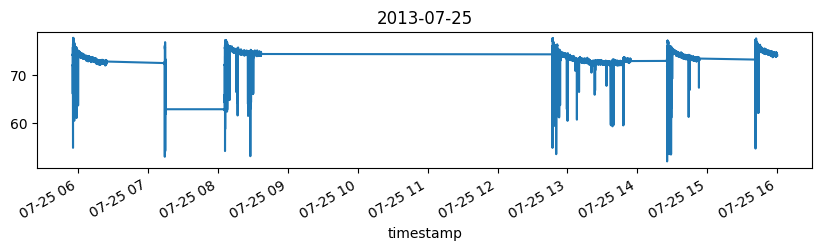

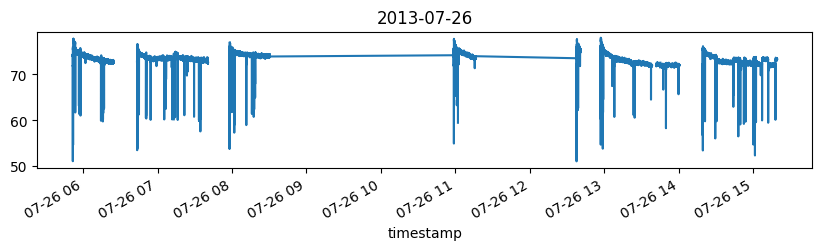

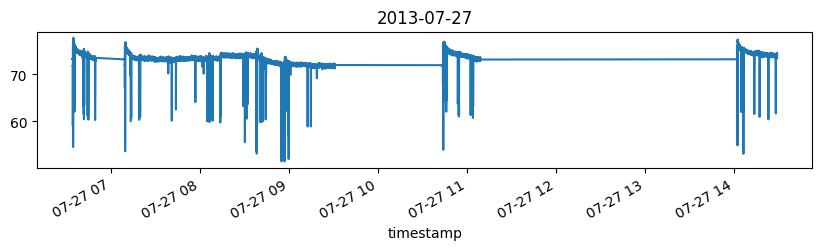

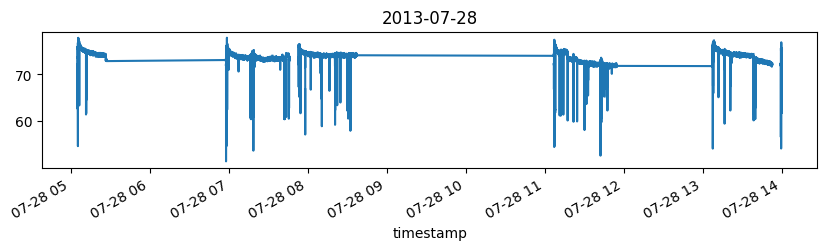

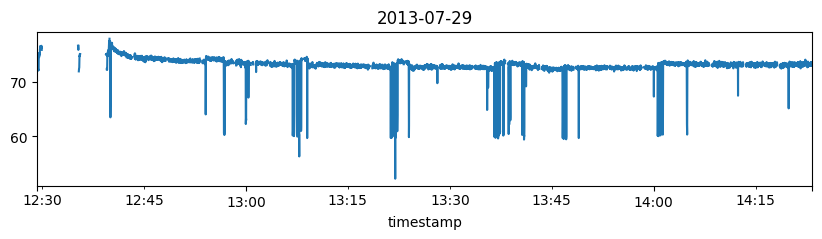

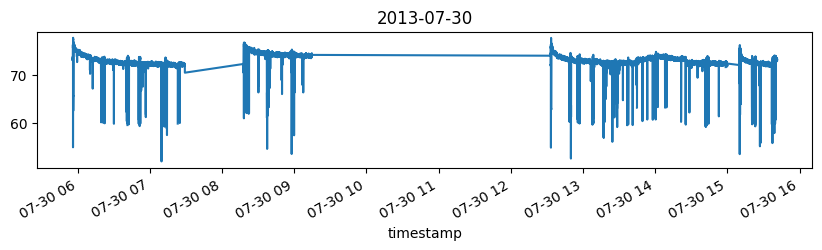

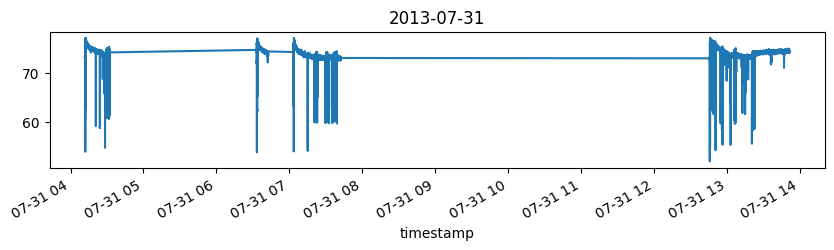

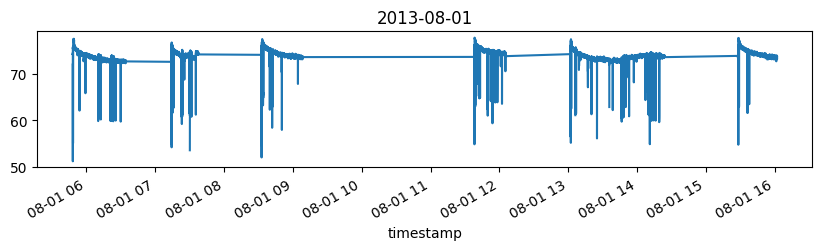

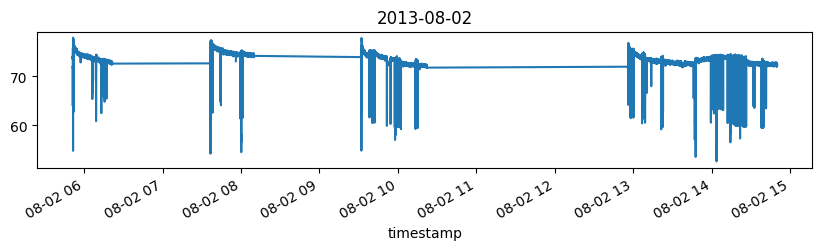

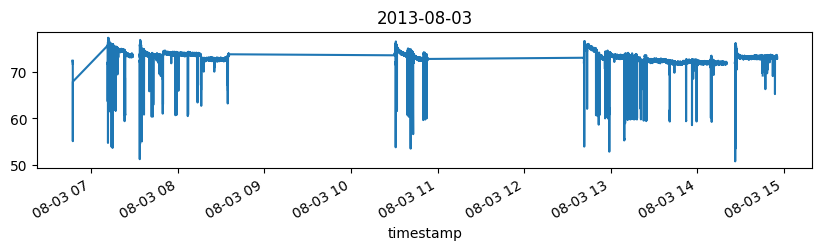

In [14]:
unique_dates = pd.Series(df.index.date).unique()
for date1 in unique_dates:
    # print(date1)
    df_date = df[df.index.to_series().dt.date == date1]
    df_date['tv_A'].plot()
    plt.title(date1)
    plt.show()